###Case study NLP classifier
The dataset contains 5573 emails where they are labeled as spam and ham, where 4825 are ham
(non spam) and 747 spam emails. We need to build a NLP classifier that specially uses word2vec
from Google. Divide the dataset into 80 and 20 percent and build 3 types of models
1. CBOW
2. Skipgram
3. Pretrained word2vec model from Google
Please do necessary pre-processing methods before building the NLP classification model.

# Importing libraries

In [ ]:
!python -m spacy download en_core_web_lg

2022-10-22 02:26:03.222447: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 17 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import gensim

In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
import re
import string

# Importing the data set

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [ ]:
df.rename({'v1': 'category', 'v2': 'text'}, axis=1, inplace=True)

In [ ]:
df.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.text[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
df.category.value_counts()

ham     4825
spam     747
Name: category, dtype: int64

1. Using Spacy

In [ ]:
def spacy_process(text):
    filtered = []
    doc = nlp(text)
    for token in doc:
        if token.is_stop or token.is_punct or token.is_space:
            continue
        if token.has_vector:
            filtered.append(token.lemma_)
    return " ".join(filtered)

In [ ]:
df['spacy_filtered'] = df['text'].apply(spacy_process)

In [ ]:
df.head()

,category,text,spacy_filtered
0,ham,"Go until jurong point, crazy.. Available only ...",point crazy available n great world la e buffe...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 comp win FA Cup final 21st 2005 t...
3,ham,U dun say so early hor... U c already then say...,U dun early hor u c
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go live


In [ ]:
df['spacy_vector'] = df['spacy_filtered'].apply(lambda text: nlp(text).vector)

In [ ]:
df['spacy_vector'][0].shape

(300,)

In [ ]:
le = LabelEncoder()
y = le.fit_transform(df.category)

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([4825,  747]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.spacy_vector.values, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [ ]:
mx_scale = MinMaxScaler()

In [ ]:
scaled_fit = mx_scale.fit(X_train_2d)
scaled_train = scaled_fit.transform(X_train_2d)
scaled_test = scaled_fit.transform(X_test_2d)

In [ ]:
#Modelling using Naive-Bayes
nbc = MultinomialNB()

In [ ]:
spacy_nbc_model = nbc.fit(scaled_train, y_train)
spacy_nbc_pred = spacy_nbc_model.predict(scaled_test)

In [ ]:
accuracy_score(y_test, spacy_nbc_pred)

0.8645739910313901

In [ ]:
confusion_matrix(y_test, spacy_nbc_pred)

array([[962,   4],
       [147,   2]])

## 2. Gensim Word2Vec

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
def to_lower(text):
    return text.lower()

In [ ]:
def special_character(text):
    return re.sub('[^\w\s]', ' ', text)

In [ ]:
def tokenize_text(text):
    return nltk.word_tokenize(text)

In [ ]:
def remove_punct(token_list):
    return [token for token in token_list if token not in string.punctuation]

In [ ]:
def remove_stop(token_list):
    return [token for token in token_list if token not in stop_words]

In [ ]:
def lemmatize_tokens(token_list):
    return [wordnet_lemmatizer.lemmatize(token) for token in token_list]

In [ ]:
def preprocess_text(text):
    text = to_lower(text)
    text = special_character(text)
    text = tokenize_text(text)
    text = remove_punct(text)
    text = remove_stop(text)
    text = lemmatize_tokens(text)
    return text

In [ ]:
df['filtered'] = df['text'].apply(preprocess_text)

In [ ]:
df.head()

,category,text,spacy_filtered,spacy_vector,filtered
0,ham,"Go until jurong point, crazy.. Available only ...",point crazy available n great world la e buffe...,"[1.2490928, 0.89659774, 0.1631842, -0.6977224,...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,"[-0.14939333, 1.0167166, 0.4778967, -1.6510634...","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 comp win FA Cup final 21st 2005 t...,"[-0.30039942, -3.3519263, 2.5582006, 1.32563, ...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun early hor u c,"[-3.1497614, 2.9741237, 3.1699975, -1.5791801,...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go live,"[0.055519976, 3.9397497, -4.2775974, -0.347967...","[nah, think, go, usf, life, around, though]"


In [ ]:
tokens = pd.Series(df.filtered.values)

Continous Bag of Words and Skipgram

In [ ]:
cbow_model = gensim.models.Word2Vec(tokens, size=300, min_count=2)
sgram_model = gensim.models.Word2Vec(tokens, size=300, min_count=2, sg=1)

In [ ]:
print('cbow model vocabulary size:', len(cbow_model.wv.vocab))

cbow model vocabulary size: 3976


In [ ]:
print('skgram model vocabulary size:', len(sgram_model.wv.vocab))





skgram model vocabulary size: 3976


In [ ]:
cbow_model.wv.most_similar('great')

[('one', 0.9999725818634033),
 ('got', 0.9999725818634033),
 ('get', 0.9999715089797974),
 ('today', 0.9999712705612183),
 ('amp', 0.9999711513519287),
 ('day', 0.9999709129333496),
 ('see', 0.9999706745147705),
 ('thing', 0.9999700784683228),
 ('go', 0.9999699592590332),
 ('make', 0.9999693036079407)]

In [ ]:
sgram_model.wv.most_similar('great')

[('wish', 0.9987596869468689),
 ('life', 0.9982153177261353),
 ('always', 0.998131513595581),
 ('nice', 0.9976372718811035),
 ('god', 0.9974559545516968),
 ('hey', 0.9972711801528931),
 ('sleep', 0.9972165822982788),
 ('ya', 0.9972068071365356),
 ('smile', 0.9970765113830566),
 ('miss', 0.9969550371170044)]

Word embeddings to Sentence embeddings

In [ ]:
def get_mean_vector(word2vec_model, words):
    # remove out-of-vocabulary words
    words = [word for word in words if word in word2vec_model.wv.vocab]
    if len(words) >= 1:
        return np.mean(word2vec_model.wv[words], axis=0)
    else:
        return np.nan #nan easier to work with

In [ ]:
df['cbow_vectors'] = df['filtered'].apply(lambda x: get_mean_vector(cbow_model, x))

In [ ]:
df['sgram_vectors'] = df['filtered'].apply(lambda x: get_mean_vector(sgram_model, x))

In [ ]:
df.head(2)

,category,text,spacy_filtered,spacy_vector,filtered,cbow_vectors,sgram_vectors
0,ham,"Go until jurong point, crazy.. Available only ...",point crazy available n great world la e buffe...,"[1.2490928, 0.89659774, 0.1631842, -0.6977224,...","[go, jurong, point, crazy, available, bugis, n...","[0.047279984, 0.12766424, -0.028245358, 0.1565...","[0.06938519, 0.06653551, -0.040228587, 0.11100..."
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,"[-0.14939333, 1.0167166, 0.4778967, -1.6510634...","[ok, lar, joking, wif, u, oni]","[0.0409202, 0.11292618, -0.025719449, 0.139374...","[0.06030607, 0.058145303, -0.041071262, 0.1058..."


In [ ]:
df.shape

(5572, 7)

In [ ]:
df.isnull().sum()

category           0
text               0
spacy_filtered     0
spacy_vector       0
filtered           0
cbow_vectors      23
sgram_vectors     23
dtype: int64

In [ ]:
df[df['cbow_vectors'].isnull() == True]

,category,text,spacy_filtered,spacy_vector,filtered,cbow_vectors,sgram_vectors
252,ham,What you doing?how are you?,,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],NaN,NaN
450,ham,hanks lotsly!,hank,"[0.847, -1.4126, -2.1883, 0.54246, -0.60491, -...","[hank, lotsly]",NaN,NaN
508,ham,What's the significance?,significance,"[0.11191, 1.1441, 0.15109, 0.76535, 5.5421, -0...",[significance],NaN,NaN
782,ham,Beerage?,,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[beerage],NaN,NaN
892,ham,Nutter. Cutter. Ctter. Cttergg. Cttargg. Ctarg...,Nutter cutter ie,"[-1.8332567, -0.16826333, 0.35149994, 1.981266...","[nutter, cutter, ctter, cttergg, cttargg, ctar...",NaN,NaN
959,ham,Where @,,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],NaN,NaN
1444,ham,Those ducking chinchillas,duck chinchilla,"[0.28169, -0.79243004, 0.064450026, -0.3465350...","[ducking, chinchilla]",NaN,NaN
1591,ham,That's my honeymoon outfit. :),honeymoon outfit,"[-1.4281, 1.2529299, -2.1382, -3.04635, 0.2505...","[honeymoon, outfit]",NaN,NaN
1611,ham,645,645,"[-0.83258, -2.923, 2.1926, -1.1998, -0.93677, ...",[645],NaN,NaN
1835,ham,* Will be september by then!,september,"[-3.0635, -1.7593, -1.3114, -0.81801, 1.9146, ...",[september],NaN,NaN


In [ ]:
df = df.dropna().reset_index(drop=True)
df.head(3)

,category,text,spacy_filtered,spacy_vector,filtered,cbow_vectors,sgram_vectors
0,ham,"Go until jurong point, crazy.. Available only ...",point crazy available n great world la e buffe...,"[1.2490928, 0.89659774, 0.1631842, -0.6977224,...","[go, jurong, point, crazy, available, bugis, n...","[0.047279984, 0.12766424, -0.028245358, 0.1565...","[0.06938519, 0.06653551, -0.040228587, 0.11100..."
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,"[-0.14939333, 1.0167166, 0.4778967, -1.6510634...","[ok, lar, joking, wif, u, oni]","[0.0409202, 0.11292618, -0.025719449, 0.139374...","[0.06030607, 0.058145303, -0.041071262, 0.1058..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 comp win FA Cup final 21st 2005 t...,"[-0.30039942, -3.3519263, 2.5582006, 1.32563, ...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[0.03784904, 0.10350326, -0.02264427, 0.127435...","[0.040509034, 0.11105789, -0.021709016, 0.1099..."


In [ ]:
df.shape

(5549, 7)

In [ ]:
X_cbow = pd.DataFrame(df['cbow_vectors'].values.tolist())
X_sgram = pd.DataFrame(df['sgram_vectors'].values.tolist())

In [ ]:
X_cbow.shape, X_sgram.shape

((5549, 300), (5549, 300))

In [ ]:
df.category.value_counts()

ham     4802
spam     747
Name: category, dtype: int64

In [ ]:
label_encode = LabelEncoder()

In [ ]:
y = label_encode.fit_transform(df['category'])
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([4802,  747]))

In [ ]:
X_train_cbow, X_test_cbow, y_train_cbow, y_test_cbow = train_test_split(X_cbow, y, 
                                                                        test_size=0.2, 
                                                                        random_state=42, 
                                                                        stratify=y)

In [ ]:
X_train_cbow.shape, X_test_cbow.shape

((4439, 300), (1110, 300))

In [ ]:
y_train_cbow.shape, y_test_cbow.shape

((4439,), (1110,))

In [ ]:
X_train_sgram, X_test_sgram, y_train_sgram, y_test_sgram = train_test_split(X_sgram, y, 
                                                                            test_size=0.2, 
                                                                            random_state=42, 
                                                                            stratify=y)

In [ ]:
#modelling
def build_model(model_name, train_data, test_data):
    train_X, train_y = train_data
    test_X, test_y = test_data
    model_fit = model_name.fit(train_X, train_y)
    model_pred = model_fit.predict(test_X)
    print(f'\nAccuracy score is: {accuracy_score(test_y, model_pred)}')
    print(f'\nConfusion matrix: \n{confusion_matrix(test_y, model_pred)}')

## CBOW Model

In [ ]:
cbow_pipe = Pipeline([('scale_date', MinMaxScaler()), 
                      ('naive_bayes', MultinomialNB())])

In [ ]:
build_model(cbow_pipe, (X_train_cbow, y_train_cbow), (X_test_cbow, y_test_cbow))


Accuracy score is: 0.745945945945946

Confusion matrix: 
[[798 163]
 [119  30]]


## SKIPGRAM Model

In [ ]:
sgram_pipe = Pipeline([('scale_date', MinMaxScaler()), 
                      ('naive_bayes', MultinomialNB())])

In [ ]:
build_model(sgram_pipe, (X_train_sgram, y_train_sgram), (X_test_sgram, y_test_sgram))


Accuracy score is: 0.9540540540540541

Confusion matrix: 
[[933  28]
 [ 23 126]]


## Using Keras Embedding layer

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, Flatten

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [ ]:
df.rename({'v1': 'category', 'v2': 'text'}, axis=1, inplace=True)
df.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.groupby('category').describe().T

category                        ham  \
text count                     4825   
     unique                    4516   
     top     Sorry, I'll call later   
     freq                        30   

category                                                  spam  
text count                                                 747  
     unique                                                653  
     top     Please call our customer service representativ...  
     freq                                                    4

In [ ]:
df['category_enc'] = df['category'].map({'ham': 0, 'spam': 1})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category_enc'], 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=df['category_enc'])

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
train_encoded = tokenizer.texts_to_sequences(X_train)
test_encoded = tokenizer.texts_to_sequences(X_test)
print(train_encoded[0:2])

[[72, 18, 326, 118, 1268], [1, 347, 23, 1269, 665, 5, 422]]


In [ ]:
train_len = [len(i) for i in train_encoded]
print(np.median(train_len))
print(np.mean(train_len))
print(np.max(train_len))

12.0
15.757011442674445
189


In [ ]:
max_len = 50

In [ ]:
train_padded = pad_sequences(train_encoded, maxlen=max_len, padding='post')
test_padded = pad_sequences(test_encoded, maxlen=max_len, padding='post')

In [ ]:
test_padded

array([[ 122,  150,   48, ...,    0,    0,    0],
       [   1,   59,    8, ...,    0,    0,    0],
       [  39,   19,   37, ...,    0,    0,    0],
       ...,
       [  37,  549,  700, ...,    0,    0,    0],
       [ 112,    1,  760, ...,    0,    0,    0],
       [ 103,   62, 1100, ...,    0,    0,    0]], dtype=int32)

In [ ]:
len(train_encoded[10])

13

In [ ]:
len(train_padded[10])

50

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

## Simple RNN model

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=300, input_length=max_len))
model.add(SimpleRNN(128, dropout=0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 300)           2375700   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               54912     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,447,253
Trainable params: 2,447,253
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
history = model.fit(train_padded, 
                    y_train, 
                    epochs=50, 
                    validation_data=[test_padded, y_test], 
                    callbacks=[early_stop], 
                    verbose=2)

Epoch 1/50
140/140 - 10s - loss: 0.3946 - accuracy: 0.8643 - val_loss: 0.3931 - val_accuracy: 0.8664 - 10s/epoch - 73ms/step
Epoch 2/50
140/140 - 8s - loss: 0.3934 - accuracy: 0.8658 - val_loss: 0.3880 - val_accuracy: 0.8664 - 8s/epoch - 56ms/step
Epoch 3/50
140/140 - 8s - loss: 0.4013 - accuracy: 0.8658 - val_loss: 0.3957 - val_accuracy: 0.8664 - 8s/epoch - 56ms/step
Epoch 4/50
140/140 - 8s - loss: 0.3942 - accuracy: 0.8658 - val_loss: 0.3871 - val_accuracy: 0.8664 - 8s/epoch - 56ms/step
Epoch 5/50
140/140 - 9s - loss: 0.3537 - accuracy: 0.8652 - val_loss: 0.3029 - val_accuracy: 0.8664 - 9s/epoch - 61ms/step
Epoch 6/50
140/140 - 8s - loss: 0.2236 - accuracy: 0.9123 - val_loss: 0.2814 - val_accuracy: 0.9211 - 8s/epoch - 55ms/step
Epoch 7/50
140/140 - 8s - loss: 0.1494 - accuracy: 0.9511 - val_loss: 0.2929 - val_accuracy: 0.9067 - 8s/epoch - 56ms/step
Epoch 8/50
140/140 - 8s - loss: 0.1713 - accuracy: 0.9408 - val_loss: 0.3077 - val_accuracy: 0.8933 - 8s/epoch - 56ms/step
Epoch 9/50
140

In [ ]:
rnn_data = pd.DataFrame(history.history)
rnn_data.head()

,loss,accuracy,val_loss,val_accuracy
0,0.394604,0.864258,0.393074,0.866368
1,0.393402,0.865829,0.387974,0.866368
2,0.401256,0.865829,0.395694,0.866368
3,0.394213,0.865829,0.387103,0.866368
4,0.353743,0.865156,0.302940,0.866368


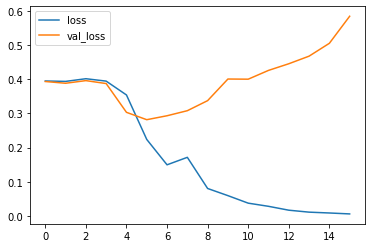

In [ ]:
rnn_data[['loss', 'val_loss']].plot()

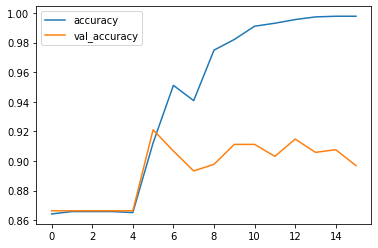

In [ ]:
rnn_data[['accuracy', 'val_accuracy']].plot()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
predictions = (model.predict(test_padded) > 0.5).astype('int32')

35/35 [==============================] - 1s 14ms/step


In [ ]:
accuracy_score(y_test, predictions)

0.8968609865470852

In [ ]:
confusion_matrix(y_test, predictions)

array([[904,  62],
       [ 53,  96]])